In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

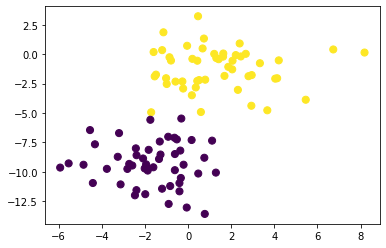

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(100,2,centers=2,random_state=2,cluster_std=1.75)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')

In [3]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y);

In [4]:
rng=np.random.RandomState(0)
Xnew= [-6, -14] + [14, 18] *rng.rand(2000, 2)
ynew=model.predict(Xnew)

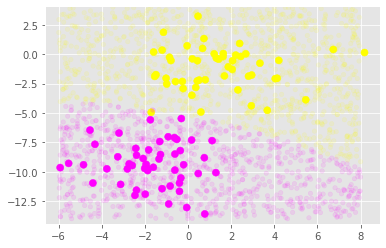

In [5]:
plt.style.use('ggplot')
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
lim=plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='spring',alpha=0.1)
plt.axis(lim);

In [6]:
import pandas as pd
df=pd.read_csv('../input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
cleanup_nums = {"Species":     {"Iris-setosa": 1, "Iris-versicolor": 2,'Iris-virginica':3}}

In [8]:
df=df.replace(cleanup_nums)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [9]:
df=df.drop('Id',axis=1)

In [10]:
npdf=np.array(df)

In [11]:
X=npdf[:,0:-1]
y=npdf[:,-1]

In [12]:
from sklearn.model_selection import  train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=42)

In [13]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,ytrain);

In [14]:
ypredicted=model.predict(Xtest)

In [15]:
from sklearn import metrics
print(metrics.accuracy_score(ytest, ypredicted))

1.0


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypredicted)
cm

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]])